In [27]:
import pandas as pd
import numpy as np
import gensim
import pyLDAvis
from wordcloud import WordCloud
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_json('/Users/paulo/repositories/developments/personalization/army.json',lines=True)

In [3]:
df.head()

,applicationid,context,eventid,id,title,users
0,Page,{'keywords': 'cmp simpósio ccomsex com soc agê...,pageViewed,1,Centro de Comunicação Social do Exército promo...,f9241a75-64fa-490b-b983-18e2ad479854
1,Page,{'keywords': '23ª bda inf sl cmn meio ambiente...,pageViewed,2,51º Batalhão de Infantaria de Selva inaugura b...,5d435499-8eae-403a-ad58-b9e9cb55c8df
2,Page,{'keywords': 'cms fronteira 5ª de 15ª bda inf ...,pageViewed,3,Disponibilidade permanente de militares do Exé...,49f42814-1adc-4ffd-a177-a356f0346eec
3,Page,{'keywords': 'cma selva operações na selva 1bi...,pageViewed,4,"Em permanente estado de prontidão, integrantes...",122b8b03-c818-4b54-a569-d257b818db76
4,Page,{'keywords': 'alusivos 31 de março'},pageViewed,5,31 de março de 1964 - Ordem do Dia,efaf2f32-3eeb-4c66-84e1-a9dce6d7fa94


In [23]:
corpus = [df.context[i].get('keywords') for i in range(len(df)) if len(df.context[i].get('keywords'))>0]
corpus[:10]

['cmp simpósio ccomsex com soc agência verde-oliva',
 '23ª bda inf sl cmn meio ambiente 51º bis',
 'cms fronteira 5ª de 15ª bda inf mec operação fronteira sul brigada guarani',
 'cma selva operações na selva 1bis(amv)',
 'alusivos 31 de março',
 'cml funceb vice-presidente general mourão',
 'cma 1ª bda inf sl 12º esqd c mec primeira visita oficial',
 'cmp reserva agência verde-oliva encontro cmb',
 'cmp universidade parceria agência verde-oliva',
 'cms 14ª bda inf mtz dia da água meio ambiente']

In [26]:
wc = WordCloud(background_color='white').generate(''.join(corpus))

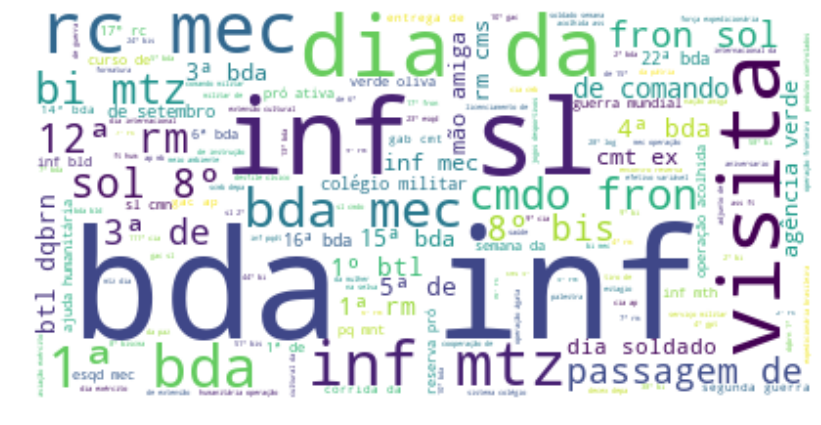

In [28]:
plt.figure(figsize=(14,14))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [32]:
id2token = gensim.corpora.Dictionary([tags.split() for tags in corpus])
bow      = [id2token.doc2bow(doc) for doc in [tags.split() for tags in corpus]]

In [50]:
model = gensim.models.TfidfModel(bow)

In [54]:
lda_model = gensim.models.LdaMulticore(corpus=model[bow], num_topics=10, id2word=id2token, workers=3, passes=2)

In [57]:
import pyLDAvis.gensim

viz = pyLDAvis.gensim.prepare(lda_model, bow, id2token)
pyLDAvis.save_html(viz, 'army.html')

/anaconda3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))
